# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


## Generate Cities List

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv"'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls



In [4]:
#set up list for each column in dataframe
City_name=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lng=[]
Lat=[]
Max_Temp = []
Wind_speed=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    #set base URL
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    #set temp unit
    units = 'imperial'
    # Build query URL and request your results in Celsius
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    weather_json = requests.get(query_url).json()
    try:
        City_name.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lng.append(weather_json['coord']['lon'])
        Lat.append(weather_json['coord']['lat'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_speed.append(weather_json['wind']['speed'])
        print(f'{city} is found')
    except:
        print('>CITY NOT FOUND!!!<')


>CITY NOT FOUND!!!<
albany is found
singapore is found
port elizabeth is found
bethel is found
rikitea is found
kitgum is found
mataura is found
jamestown is found
qarqin is found
ushuaia is found
kodiak is found
mandalgovi is found
port alfred is found
kyren is found
cherskiy is found
>CITY NOT FOUND!!!<
ancud is found
malanje is found
>CITY NOT FOUND!!!<
busselton is found
arenzano is found
cape town is found
>CITY NOT FOUND!!!<
bluff is found
caucaia is found
vaini is found
puerto ayora is found
kalmunai is found
>CITY NOT FOUND!!!<
benghazi is found
manggar is found
yellowknife is found
nishihara is found
tazovskiy is found
butaritari is found
lorengau is found
airai is found
tasiilaq is found
clarence town is found
tocatlan is found
takoradi is found
bredasdorp is found
tual is found
abreus is found
half moon bay is found
houma is found
yerbogachen is found
punta arenas is found
khatanga is found
avera is found
kapaa is found
rebrikha is found
mahebourg is found
hilo is found
sain

belaya gora is found
>CITY NOT FOUND!!!<
azoyu is found
shellbrook is found
riyadh is found
otradnoye is found
ust-ilimsk is found
>CITY NOT FOUND!!!<
srednekolymsk is found
>CITY NOT FOUND!!!<
arukutti is found
>CITY NOT FOUND!!!<
alencon is found
papara is found
yanam is found
eyl is found
fereydun kenar is found
kewanee is found
vestmannaeyjar is found
grand gaube is found
aljezur is found
burnie is found
evensk is found
tairua is found
deloraine is found
tulsipur is found
>CITY NOT FOUND!!!<
ca mau is found
margate is found
saurimo is found
beringovskiy is found
san juan is found
palu is found
>CITY NOT FOUND!!!<
vestmanna is found
sabang is found
maceio is found
remscheid is found
ryomgard is found
yermakovskoye is found
lisakovsk is found
ilhabela is found
roswell is found
walvis bay is found
son la is found
cabo san lucas is found
>CITY NOT FOUND!!!<
mandiana is found
cadillac is found
mbandaka is found
chimore is found
kontagora is found
live oak is found
marawi is found
narsaq

### Convert Raw Data to DataFrame

In [6]:

weather_dict = {
    'City': City_name,
    'Cloudiness': Cloudiness,
    'Country': Country,
    'Date': Date,
    'Humidity': Humidity,
    'Lng': Lng,
    'Lat': Lat,
    'Max Temp': Max_Temp,
    'Wind speed': Wind_speed 
}
weather_data = pd.DataFrame(weather_dict)

# Export file as a CSV, without the Pandas index, but with the header
weather_data.to_csv('../weather_data.csv', index=False, header=True)
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lng,Lat,Max Temp,Wind speed
0,Albany,20,US,1544327640,64,-73.75,42.65,24.08,6.93
1,Singapore,40,MY,1544328000,74,103.85,1.29,87.80,2.24
2,Port Elizabeth,1,US,1544327760,74,-74.98,39.31,28.40,6.73
3,Bethel,90,US,1544328000,95,-161.76,60.79,24.98,6.93
4,Rikitea,88,PF,1544329069,99,-134.97,-23.12,78.11,13.22
5,Kitgum,36,UG,1544329517,100,32.88,3.30,58.89,2.82
6,Mataura,92,NZ,1544329070,95,168.86,-46.19,62.49,11.43
7,Jamestown,24,AU,1544329047,35,138.60,-33.21,88.64,10.20
8,Qarqin,76,AF,1544329518,95,66.03,37.41,49.53,8.41
9,Ushuaia,75,AR,1544328000,61,-68.31,-54.81,48.20,5.82


# Plotting the Data


#### Latitude vs. Temperature Plot

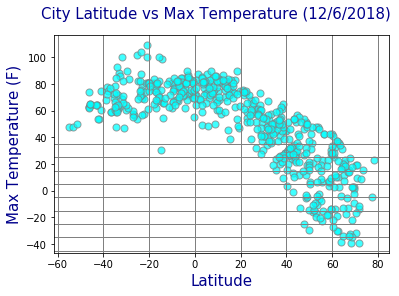

In [8]:
x = weather_data['Max Temp']
plt.scatter(weather_data['Lat'], x, s = 50, color = 'cyan', edgecolor = 'grey', alpha = .75)
# Reference lines
for i in list(np.arange(-45, 45, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.xlabel('Latitude',color= 'darkblue',size='15')
plt.ylabel('Max Temperature (F)',color='darkblue',size='15')
plt.suptitle('City Latitude vs Max Temperature (12/6/2018)', color='darkblue',size =15)
plt.savefig('../Images/lat_vs_temp.png')


#### Latitude vs. Humidity Plot

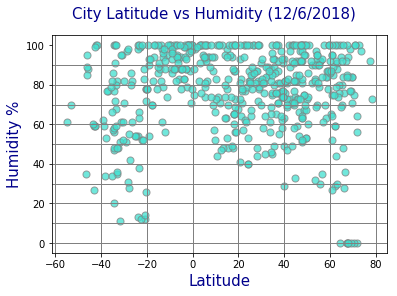

In [7]:
x = weather_data['Humidity']
#Plot chart
plt.scatter(weather_data['Lat'], x, s = 50, color = 'turquoise', edgecolor = 'grey', alpha = .75)
# Reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.xlabel('Latitude',color= 'darkblue',size='15')
plt.ylabel('Humidity %',color='darkblue',size='15')
plt.suptitle('City Latitude vs Humidity (12/6/2018)', color='darkblue',size =15)
plt.savefig("../Images/lat_vs_humid.png")

#### Latitude vs. Cloudiness Plot

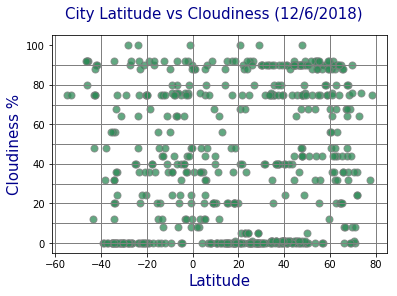

In [8]:
x = weather_data['Cloudiness']
#Plot chart
plt.scatter(weather_data['Lat'], x, s = 50, color = 'seagreen', edgecolor = 'grey', alpha = .75)
# Reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.xlabel('Latitude',color= 'darkblue',size='15')
plt.ylabel('Cloudiness %',color='darkblue',size='15')
plt.suptitle('City Latitude vs Cloudiness (12/6/2018)', color='darkblue',size =15)
plt.savefig("../Images/lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

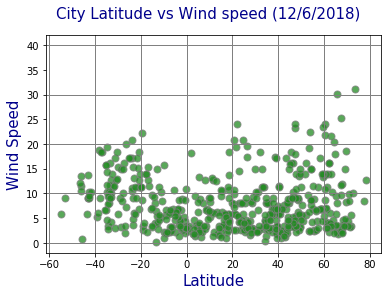

In [9]:
x = weather_data['Wind speed']
#Plot chart
plt.scatter(weather_data['Lat'], x, s = 50, color = 'forestgreen', edgecolor = 'grey', alpha = .75)
# Reference lines
for i in list(np.arange(0, 50, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.xlabel('Latitude',color= 'darkblue',size='15')
plt.ylabel('Wind Speed',color='darkblue',size='15')
plt.suptitle('City Latitude vs Wind speed (12/6/2018)', color='darkblue',size =15)
plt.savefig("../Images/lat_vs_Wind_Speed.png")